In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

In [ ]:
θ = 3
bias = 100
X = np.array([np.random.uniform(200,500) for i in range(500)])
ε = np.array([np.random.normal(0,100) for i in range(500)])
y = X * θ + bias + ε

In [ ]:
plt.scatter(X, y, alpha=0.5)
plt.xlabel("$ Spent")
plt.ylabel("Social Media Shares")

In [ ]:
θ = 3
bias = 100
X = np.array([np.random.uniform(100,110) for i in range(500)])
ε = np.array([np.random.normal(0,1) for i in range(500)])
y = np.sin(X) * θ + bias + ε

In [ ]:
plt.scatter(X, y, alpha=0.5)
plt.xlabel("$ Spent")
plt.ylabel("Social Media Shares")

In [ ]:
X = np.range(10)

Text(0.5,1,'sin(x), with 100 samples and noise')

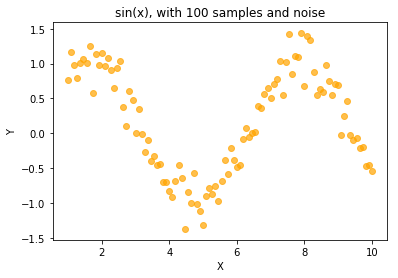

In [2]:
X_sin = np.linspace(1,10,100)
y_sin = np.sin(X_sin) + np.array([np.random.normal(0,0.2) for i in range(100)])
plt.scatter(X_sin, y_sin, alpha= 0.7, c="orange")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("sin(x), with 100 samples and noise")

In [ ]:
np.subtract.outer(x,x)

In [6]:
class Kernel:
    @staticmethod
    def get(x_1, x_2):
        return np.exp(-0.5 * np.subtract.outer(x_1, x_2) ** 2)

In [ ]:
def exponential_cov(x, y):
    return np.exp( -0.5 * np.subtract.outer(x, y)**2)

In [ ]:
exponential_cov(x_1, x).shape

In [ ]:
x = np.array([0,1,2,2])
Kernel.compute(x, x)

In [ ]:
def conditional(x_new, x, y):
    B = exponential_cov(x_new, x)
    C = exponential_cov(x, x)
    A = exponential_cov(x_new, x_new)
    mu = np.linalg.inv(C).dot(B.T).T.dot(y)
    sigma = A - B.dot(np.linalg.inv(C).dot(B.T))
    return(mu.squeeze(), sigma.squeeze())


In [ ]:
x_new = np.array([1])
x = np.array([2,3,4,5,6])

find_conditional_mu()

In [ ]:
θ = [1, 10]
σ_0 = exponential_cov(0, 0)
xpts = np.arange(-3, 3, step=0.01)
plt.errorbar(xpts, np.zeros(len(xpts)), yerr=σ_0, capsize=0)

In [ ]:
σ_1 = exponential_cov(x, x)
print(f"σ_1 is {σ_1}")
def predict(x, data, kernel, sigma, t):
    #print(f"kernel between x ({x}) and y({y}) is {kernel(x, y)}")
    k = [kernel(x, y) for y in data]
    Sinv = np.linalg.inv(sigma)
    y_pred = np.dot(k, Sinv).dot(t)
    #print(kernel(x, x))
    #print(exponential_cov(x, x))
    sigma_new = kernel(x, x) - np.dot(k, Sinv).dot(k)
    return y_pred, sigma_new

x_pred = np.linspace(-3, 3, 1000)
predictions = [predict(i, x, exponential_cov, σ_1, y) for i in x_pred]

In [ ]:
def new_predict(x_new):
    k_x_new_x = [Kernel.get(x_new, x_i) for x_i in X]
    k_x_x = Kernel.get(X,X) # covariance matrix for existing training points
    k_x_new_x_new = Kernel.get(x_new, x_new) # covariance matrix for new test points
    y_pred = np.dot(k_x_new_x, np.linalg.inv(k_x_x)).dot(y) # Equation 2.23
    updated_sigma = k_x_new_x_new - np.dot(k_x_new_x, np.linalg.inv(k_x_x)).dot(k_x_new_x) # Equation 2.24
    return y_pred.squeeze(), updated_sigma.squeeze() 

In [ ]:
y_pred, sigmas = np.transpose(predictions)
plt.errorbar(x_pred, y_pred, yerr=sigmas, capsize=0)
plt.plot(x, y, "ro")

In [ ]:
x_pred = np.linspace(-1,5,100)
predictions = [new_predict(i) for i in x_pred]
# these next few lines are entirely from Chris Fonnesbeck's blog post at Domino Data Lab!
y_pred, sigmas = np.transpose(predictions) 
plt.errorbar(x_pred, y_pred, yerr=sigmas, capsize=1)
plt.plot(X, y, "ro")
plt.title("GP Predictions Given Single Training Point (2.3, 0.922)")

In [3]:
class GaussianProcess:
    
    def __init__(self, X, y):
        self.X = X
        self.y = y
        
    def update(self, x, y):
        self.X.append(x)
        self.y.append(y)
    
    def new_predict(self, x_new):
        k_x_new_x = [Kernel.get(x_new, x_i) for x_i in self.X]
        k_x_x = Kernel.get(self.X,self.X) # covariance matrix for existing training points
        k_x_new_x_new = Kernel.get(x_new, x_new) # covariance matrix for new test points
        y_pred = np.dot(k_x_new_x, np.linalg.inv(k_x_x)).dot(self.y) # Equation 2.23
        updated_sigma = k_x_new_x_new - np.dot(k_x_new_x, np.linalg.inv(k_x_x)).dot(k_x_new_x) # Equation 2.24
        return y_pred.squeeze(), updated_sigma.squeeze() 
    
    def generate_predictions(self, prediction_interval):
        predictions = [self.new_predict(i) for i in prediction_interval]
        # these next few lines are entirely from Chris Fonnesbeck's blog post at Domino Data Lab!
        y_pred, sigmas = np.transpose(predictions) 
        plt.errorbar(prediction_interval, y_pred, yerr=sigmas, capsize=1)
        plt.plot(self.X, self.y, "ro")
        plt.title(f"GP Predictions Given {len(self.y)} Training Points (In Red)")

In [ ]:
X = [2.3]
y = [.922]
gp = GaussianProcess(X, y)
gp.update(2.4, .67)
gp.update(3, 0)
gp.update(-1,.5)
gp.update(1,1.4)
gp.update(0.2,.6)

In [ ]:

gp.generate_predictions(x_pred)

In [ ]:
np.random.shuffle(X_sin)

4
51
98
19
92
7
33
75
86


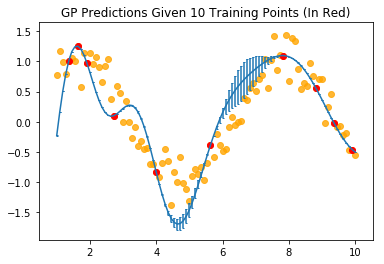

In [20]:
prediction_interval = np.linspace(1,10,100)
start = int(np.random.uniform(1,100))
gp = GaussianProcess([X_sin[start]], [y_sin[start]])
indices = range(len(prediction_interval))
for i in range(9):
    start = np.random.choice(indices, replace=False)
    print(start)
    gp.update(X_sin[start], y_sin[start])
    
gp.generate_predictions(prediction_interval)
plt.scatter(X_sin, y_sin, c="orange", alpha=0.8)

In [ ]:
X_sin[start]

In [ ]:
y_sin